# Machine Learning Model for MNIST Dataset

In [8]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Load and Preprocess MNIST Dataset

In [9]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target

# Convert labels to integers
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define the Pipeline with a KNeighborsClassifier model

In [10]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Normalization
    ('pca', PCA()),                      # Reduct dimension
    ('knn', KNeighborsClassifier())      # KNN Classifier model
])

# Grid search parameters
param_grid = {
    'pca__n_components': [50, 100],             # Number of components for PCA
    'knn__n_neighbors': [3, 5, 7],              # Number of neighbors for KNN
    'knn__weights': ['uniform', 'distance'],    # Weight function for prediction
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

## Train the Model

In [11]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [50, 100]},
             scoring='accuracy', verbose=2)

In [12]:
# Sauvegarder le modèle
joblib.dump(grid_search.best_estimator_, 'digit_KNN_trained.pkl')

['digit_KNN_trained.pkl']

## Evaluate the Model

Best parameters : {'knn__n_neighbors': 3, 'knn__weights': 'distance', 'pca__n_components': 50}
Test accuracy : 0.9566964202528466

Classification Report on the test dataset : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.96      0.96      1380
           3       0.95      0.94      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.96      0.95      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.97      0.95      0.96      1503
           8       0.95      0.94      0.95      1357
           9       0.92      0.94      0.93      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



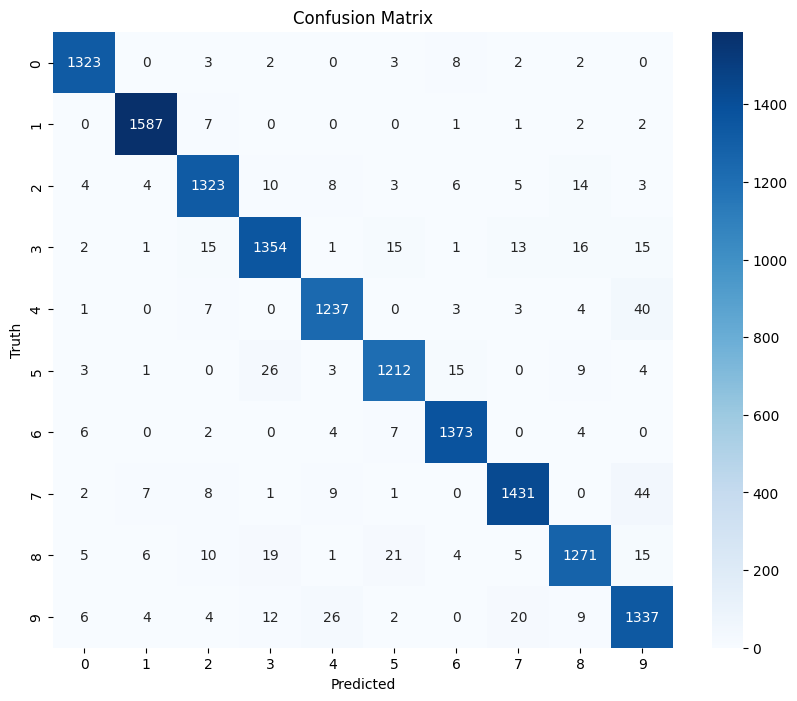

In [13]:
print(f"Best parameters : {grid_search.best_params_}")
print(f"Test accuracy : {grid_search.best_score_}")

y_pred = grid_search.best_estimator_.predict(X_test)

print("\nClassification Report on the test dataset : ")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()